In [1]:
import sys
sys.path.append('/home/kfuruglyas/Documents/popularity_versus_similarity/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pvs import network_creation as nc

from tqdm.notebook import tqdm

import networkx as nx

In [3]:
Nodes = nc.Nodes(n = 4039, m = 22, beta = 0.4,T = 1.55)

Adding nodes:   0%|          | 0/4039 [00:00<?, ?it/s]/home/kfuruglyas/Documents/popularity_versus_similarity/pvs/network_creation.py:91: RuntimeWarning: divide by zero encountered in log
  dists[key] = np.log(nodes[n]['pos']*nodes[key]['pos']


KeyboardInterrupt: 

In [ ]:
Nodes.nodes[2].keys()

In [ ]:
df = pd.DataFrame().from_dict(Nodes.nodes, orient='index')

In [ ]:
conn = [len(c) for c in df.conns]


In [ ]:
plt.plot(conn)

In [ ]:
Nodes.nodes[1]

AttributeError: 'DataFrame' object has no attribute 'num_of_edges'

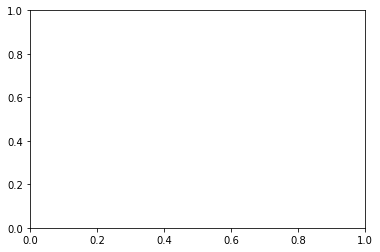

In [18]:
fig, ax = plt.subplots(1,1, facecolor = 'white')

bins = np.logspace(np.log10(Nodes.df.num_of_edges.min()),np.log10(Nodes.df.num_of_edges.max()), 100)

Nodes.df.num_of_edges.hist(bins = bins, ax = ax)

ax.set_yscale('log')
ax.set_xscale('log')

In [9]:
def create_edgelist(Nodes, fn):
    f = open(fn, 'w')

    for index, row in tqdm(Nodes.df.iterrows(), total = len(Nodes.df)):
        n1 = row.id
        elist_ = row.edges
        elist = [e for e in elist_ if e > n1]
        for n2 in elist:
            f.write(f"{n1} {n2}\n")        
    f.close()

In [10]:
create_edgelist(Nodes, "edgelist.txt")

0it [00:00, ?it/s]

In [11]:
nodes = Nodes.nodes

In [12]:
print(nodes[1]["conns"])
print(nodes[3718]["conns"])

[2, 3, 5, 8, 11, 16, 18, 20, 21, 26, 27, 35, 37, 40, 42, 49, 50, 51, 52, 53, 55, 57, 58, 61, 66, 68, 70, 79, 81, 84, 85, 92, 96, 100, 101, 105, 107, 110, 116, 118, 123, 132, 133, 134, 135, 137, 138, 146, 147, 149, 150, 152, 154, 157, 169, 178, 179, 181, 196, 198, 204, 205, 209, 213, 225, 229, 259, 268, 277, 279, 285, 292, 294, 298, 314, 330, 333, 340, 348, 355, 368, 380, 381, 389, 393, 414, 423, 456, 486, 507, 531, 533, 535, 536, 558, 564, 565, 568, 572, 607, 615, 619, 637, 651, 656, 691, 696, 708, 711, 720, 725, 729, 757, 769, 772, 776, 783, 828, 848, 854, 938, 967, 970, 975, 980, 1007, 1013, 1018, 1086, 1119, 1143, 1190, 1199, 1410, 1417, 1453, 1536, 1541, 1561, 1638, 1666, 1726, 1735, 1739, 1742, 1757, 1761, 1822, 1845, 1992, 2007, 2011, 2021, 2058, 2302, 2349, 2371, 2445, 2497, 2585, 2911, 2986, 3058, 3152, 3171, 3237, 3283, 3332, 3683]
[1903, 2075, 523, 160, 2395, 1468, 1420, 1567, 1313, 2717, 1284, 800, 876, 1213, 1252, 2303, 273, 3428, 329, 3658, 2242, 2499, 3772, 3777, 4012]


In [14]:
G = Nodes.to_networkx()

In [17]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88164
Average degree:  43.6564
